In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import warnings
warnings.filterwarnings('ignore')

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import pandas as pd
df = pd.read_csv('araka.csv')
df.head()

,code_module,code_presentation,id_student,sum_click,final_result
0,AAA,2013J,100893,744,Pass
1,AAA,2013J,101781,4104,Pass
2,AAA,2013J,102806,1944,Pass
3,AAA,2013J,102952,1150,Pass
4,AAA,2013J,1035023,1896,Pass


In [3]:
df.shape

(735, 5)

### Generate a two-dimensional dataset containing five distinct blobs

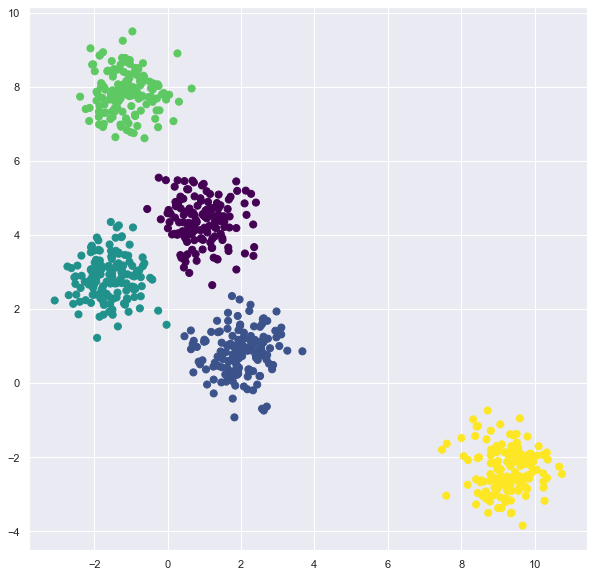

In [4]:
from sklearn.datasets.samples_generator import make_blobs
X_blobs, y_labels = make_blobs(n_samples=735, centers=5, cluster_std=0.60, random_state=0)
#
fig = plt.figure(figsize=(10,10))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1],c=y_labels,  s=50, cmap='viridis')
plt.show()

In [43]:
y_labels

array([1, 2, 2, 4, 3, 2, 3, 3, 3, 3, 4, 1, 3, 0, 0, 4, 0, 0, 1, 0, 4, 4,
       0, 1, 2, 2, 4, 3, 3, 1, 0, 4, 3, 4, 3, 2, 4, 2, 2, 4, 3, 0, 3, 0,
       2, 4, 1, 1, 1, 4, 2, 3, 1, 2, 2, 0, 4, 0, 0, 0, 0, 3, 0, 4, 0, 0,
       2, 0, 0, 0, 2, 2, 0, 3, 4, 1, 3, 2, 0, 3, 4, 3, 0, 1, 2, 4, 3, 3,
       4, 1, 0, 2, 1, 1, 4, 4, 4, 3, 4, 3, 2, 0, 1, 1, 0, 4, 4, 3, 3, 4,
       1, 2, 2, 2, 4, 0, 1, 3, 3, 2, 1, 1, 3, 4, 3, 3, 1, 0, 3, 3, 0, 4,
       2, 1, 1, 2, 2, 3, 4, 3, 3, 3, 1, 3, 1, 1, 0, 1, 0, 4, 4, 4, 2, 1,
       2, 3, 3, 3, 1, 4, 2, 3, 0, 0, 2, 0, 3, 2, 4, 3, 2, 0, 2, 2, 2, 3,
       3, 1, 3, 3, 0, 1, 2, 2, 1, 3, 3, 1, 3, 3, 2, 4, 1, 0, 0, 2, 3, 0,
       1, 3, 4, 1, 4, 3, 3, 3, 1, 4, 4, 3, 4, 1, 1, 4, 0, 4, 1, 2, 0, 0,
       2, 3, 4, 3, 4, 3, 4, 4, 0, 4, 3, 2, 3, 4, 0, 2, 3, 4, 4, 1, 0, 1,
       4, 1, 3, 0, 2, 2, 1, 4, 1, 0, 1, 0, 3, 2, 1, 4, 4, 2, 4, 0, 4, 2,
       0, 0, 4, 4, 2, 2, 2, 1, 4, 2, 3, 2, 0, 0, 1, 2, 1, 1, 1, 1, 3, 0,
       1, 3, 0, 4, 0, 2, 0, 3, 1, 3, 3, 0, 3, 0, 2,

## 2. Clustering Algorithms

### 2.1 Kmeans Clustering

In [46]:
from sklearn.cluster import KMeans
K_clusters = range(1,11)
X = df[['sum_click']]
#
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
print('Score:', score)
pd.DataFrame(score).mean()

Score: [-2386656656.4843535, -910965605.3182044, -500426190.4065954, -276233785.36671543, -166323821.79063463, -114887344.5055045, -84110890.46447206, -64284754.385072745, -51216113.47425945, -40081938.29151669]


0   -4.595187e+08
dtype: float64

In [6]:
# Variable with the Longitude and Latitude
X=df.loc[:,['sum_click']]
#
kmeans = KMeans(n_clusters = 5, init ='k-means++')
kmeans.fit(X[X.columns.values]) # Compute k-means clustering.
X['kmeans_cluster_label'] = kmeans.fit_predict(X[X.columns.values])
X

,sum_click,cluster_label
0,744,0
1,4104,4
2,1944,3
3,1150,3
4,1896,3
...,...,...
730,2280,3
731,802,0
732,901,0
733,381,0


In [44]:
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
display('Cluster Centers')
print(centers)
labels = X[['cluster_label']] # Labels of each point
print(adjusted_mutual_info_score(y_labels, X['cluster_label']))

'Cluster Centers'

[[  544.42016807]
 [ 6295.36111111]
 [12360.5       ]
 [ 1753.65020576]
 [ 3498.50537634]]
1.1591612831275306e-05


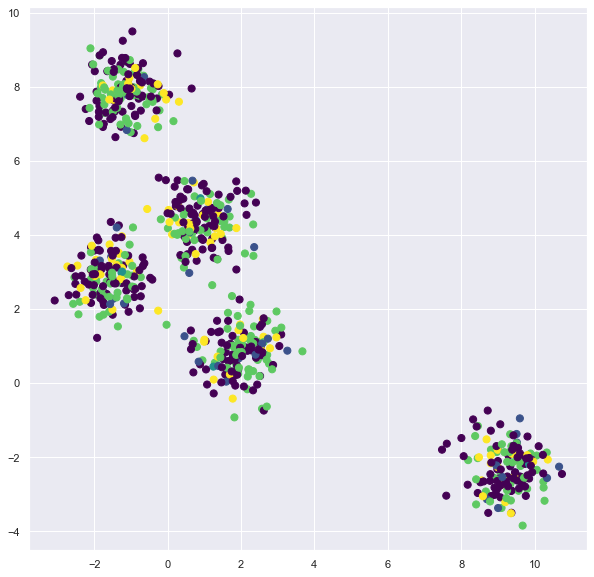

In [41]:
fig = plt.figure(figsize=(10,10))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5,cmap='viridis')
#plt.show()

Validation indices

In [32]:
from sklearn.metrics.cluster import calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import adjusted_mutual_info_score, silhouette_score
#
#define a function to calculate the scoring indices for the algorithms
def cluster_index_score(labels):
    lscores = []
    lscores.append((
        silhouette_score(X_blobs, labels),
        calinski_harabasz_score(X_blobs, labels),
        davies_bouldin_score(X_blobs, labels)))
    #
    names = ['silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score']
    ls_pd = pd.DataFrame(lscores, columns=names).T
    return ls_pd

In [33]:
cluster_index_score(X[['cluster_label']])

,0
silhouette_score,-0.137338
calinski_harabasz_score,0.746453
davies_bouldin_score,100.163393


In [35]:
#nclusters = 5
#fig = plt.figure(figsize=(15,5))
#
#ax = fig.add_subplot(131)
#plt.plot(range(1,nclusters+1), [x for x,_,_ in lscores])
#
#ax = fig.add_subplot(132)
#plt.plot(range(1,nclusters+1), [x for _, x,_ in lscores])
#
#ax = fig.add_subplot(133)
#plt.plot(range(1,nclusters+1), [x for _, _, x in lscores])
#plt.show()

## 2.2 Hierrachical Clustering

### 2.2.1Agglomerative clustering

In [30]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
X['hierarchical_cluster_label'] = cluster.fit_predict(X.loc[:,['sum_click']])
X

,sum_click,cluster_label,hierarchical_cluster_label
0,744,0,3
1,4104,4,0
2,1944,3,1
3,1150,3,1
4,1896,3,1
...,...,...,...
730,2280,3,1
731,802,0,3
732,901,0,3
733,381,0,3


In [34]:
cluster_index_score(X[['hierarchical_cluster_label']])

,0
silhouette_score,-0.134960
calinski_harabasz_score,0.445284
davies_bouldin_score,51.110209


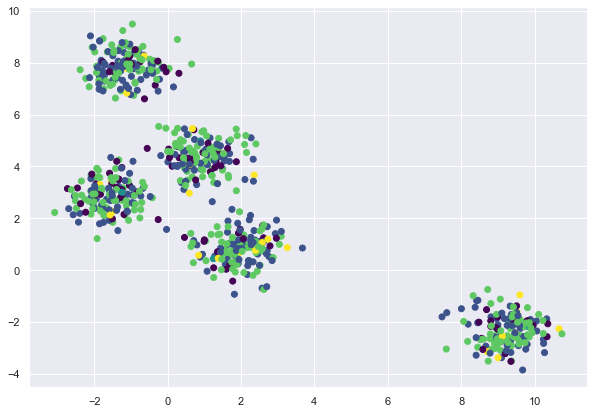

In [39]:
plt.figure(figsize=(10, 7))
plt.scatter(X_blobs[:,0], X_blobs[:,1], c=cluster.labels_, cmap='viridis')